In [ ]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/kwentar/blur-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aakashrocks
Your Kaggle Key: ··········


100%|██████████| 1.49G/1.49G [01:11<00:00, 22.3MB/s]


In [ ]:
import cv2
import os

from tqdm import tqdm

src_dir = '/content/blur-dataset/sharp'
images = os.listdir(src_dir)
dst_dir = '/content/drive/MyDrive/Data_base/Weights_aencoder'

for i, img in tqdm(enumerate(images), total=len(images)):
    img = cv2.imread(f"{src_dir}/{images[i]}")
    # add gaussian blurring
    blur = cv2.GaussianBlur(img, (51, 51), 0)
    cv2.imwrite(f"{dst_dir}/{images[i]}", blur)

print('DONE')

100%|██████████| 350/350 [01:28<00:00,  3.94it/s]

DONE


In [ ]:
! git clone https://github.com/sovit-123/image-deblurring-using-deep-learning

Cloning into 'image-deblurring-using-deep-learning'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 269 (delta 19), reused 257 (delta 11), pack-reused 0
Receiving objects: 100% (269/269), 3.84 MiB | 29.55 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/add_gaussian_blur.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/add_gaussian_blur_test_image.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/deblur_ae.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/models.py

In [ ]:
!wget -q https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/test.py

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
gauss_blur = os.listdir('/content/drive/MyDrive/Data_base/Weights_aencoder')
gauss_blur.sort()
sharp = os.listdir('/content/blur-dataset/sharp')
sharp.sort()

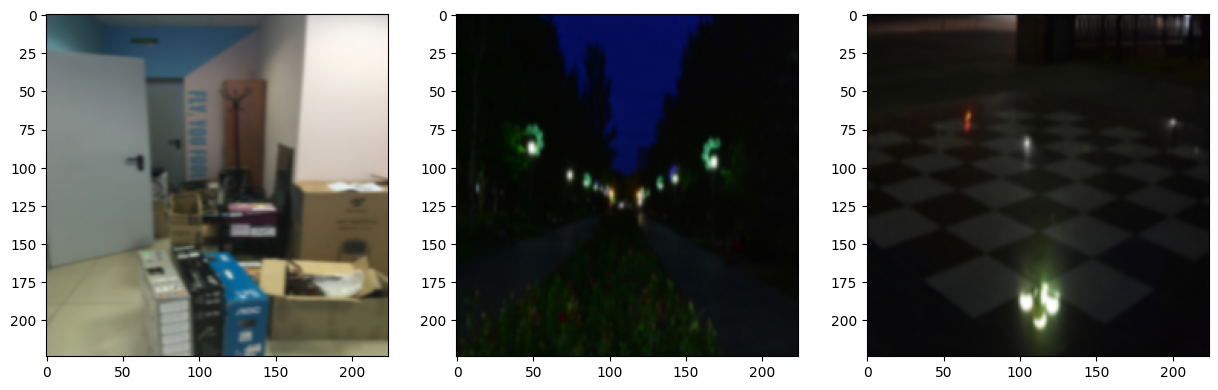

In [ ]:
plt.figure(figsize=(15, 12))
for i in range(3):
    blur_image = plt.imread(f"/content/drive/MyDrive/Data_base/Weights_aencoder/{gauss_blur[i]}")
    blur_image = cv2.resize(blur_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(blur_image)
plt.show()

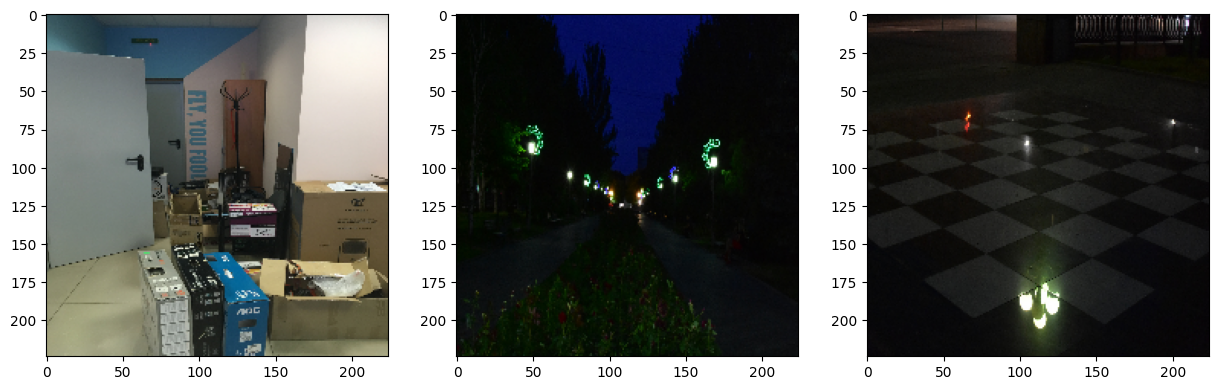

In [ ]:
plt.figure(figsize=(15, 12))
for i in range(3):
    sharp_image = plt.imread(f"/content/blur-dataset/sharp/{sharp[i]}")
    sharp_image = cv2.resize(sharp_image, (224, 224))
    plt.subplot(1, 3, i+1)
    plt.imshow(sharp_image)
plt.show()

In [ ]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader


In [ ]:
!pip install https://raw.githubusercontent.com/sovit-123/image-deblurring-using-deep-learning/master/src/deblur_ae.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Cannot unpack file /tmp/pip-unpack-ilt2r8p5/deblur_ae.py (downloaded from /tmp/pip-req-build-ur2qth89, content-type: text/plain; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-ur2qth89


In [ ]:
# model = torch.load('/content/image-deblurring-using-deep-learning/src/add_gaussian_blur.py')

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 128, kernel_size=5, padding=1)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3, kernel_size=1, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        return x

class SimpleAE(nn.Module):
    def __init__(self):
        super(SimpleAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5),
            nn.ReLU(True),
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=5),
            nn.ReLU(True),
            nn.ConvTranspose2d(32, 3, kernel_size=5),
            nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
model = SimpleAE()

In [ ]:
%%python

Enter the number of epochs: 10
cuda:0
109_HONOR-7X_S.jpg
109_HONOR-7X_S.jpg
262
88
SimpleAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 3, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)
Epoch 1 of 10


100%|██████████| 131/131 [00:39<00:00,  3.31it/s]


Train Loss: 0.00575


100%|██████████| 44/44 [00:11<00:00,  3.84it/s]


Val Loss: 0.00141
Epoch 2 of 10


100%|██████████| 131/131 [00:38<00:00,  3.37it/s]


Train Loss: 0.00099


100%|██████████| 44/44 [00:12<00:00,  3.62it/s]


Val Loss: 0.00072
Epoch 3 of 10


100%|██████████| 131/131 [00:39<00:00,  3.31it/s]


Train Loss: 0.00064


100%|██████████| 44/44 [00:12<00:00,  3.60it/s]


Val Loss: 0.00057
Epoch 4 of 10


100%|██████████| 131/131 [00:39<00:00,  3.29it/s]


Train Loss: 0.00055


100%|██████████| 44/44 [00:13<00:00,  3.22it/s]


Val Loss: 0.00052
Epoch 5 of 10


100%|██████████| 131/131 [00:40<00:00,  3.27it/s]


Train Loss: 0.00055


100%|██████████| 44/44 [00:11<00:00,  3.83it/s]


Val Loss: 0.00058
Epoch 6 of 10


100%|██████████| 131/131 [00:38<00:00,  3.37it/s]


Train Loss: 0.00051


100%|██████████| 44/44 [00:11<00:00,  3.67it/s]


Val Loss: 0.00048
Epoch 7 of 10


100%|██████████| 131/131 [00:39<00:00,  3.29it/s]


Train Loss: 0.00048


100%|██████████| 44/44 [00:12<00:00,  3.64it/s]


Val Loss: 0.00045
Epoch 8 of 10


100%|██████████| 131/131 [00:39<00:00,  3.31it/s]


Train Loss: 0.00055


100%|██████████| 44/44 [00:12<00:00,  3.64it/s]


Val Loss: 0.00117
Epoch 9 of 10


100%|██████████| 131/131 [00:39<00:00,  3.32it/s]


Train Loss: 0.00056


100%|██████████| 44/44 [00:12<00:00,  3.66it/s]


Val Loss: 0.00051
Epoch 10 of 10


100%|██████████| 131/131 [00:40<00:00,  3.25it/s]


Train Loss: 0.00051


100%|██████████| 44/44 [00:11<00:00,  3.81it/s]


Val Loss: 0.00045
Took -8.616 minutes to train


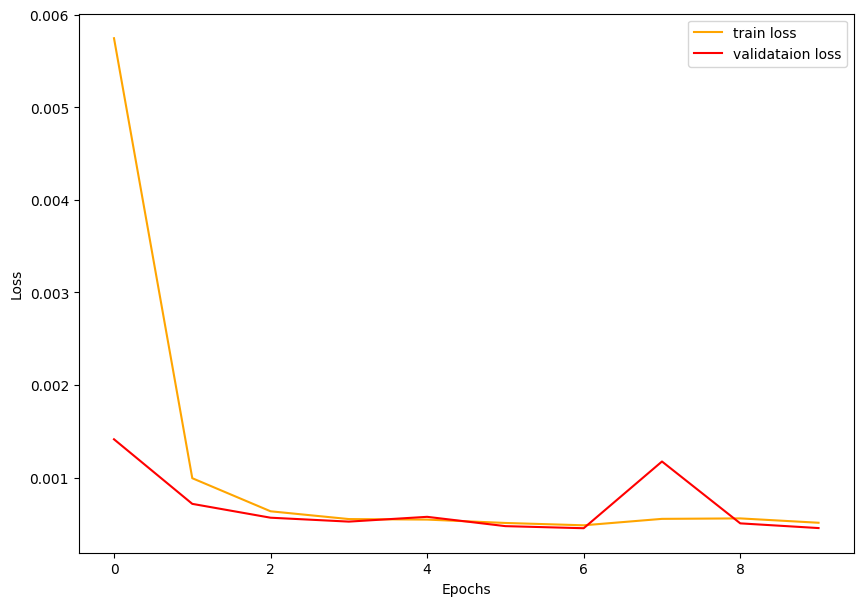

Saving model...


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import albumentations
import argparse
# import models

from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from torchvision.utils import save_image
from sklearn.model_selection import train_test_split



# constructing the argument parser
# parser = argparse.ArgumentParser()
# parser.add_argument('-e', '--epochs', type=int, default=50,
#             help='number of epochs to train the model for')
args = {}
args['epochs'] = int(input('Enter the number of epochs: '))

# helper functions
image_dir = '/content/output_images'
os.makedirs(image_dir, exist_ok=True)

def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(device)

batch_size = 2

gauss_blur = os.listdir('/content/drive/MyDrive/Data_base/Weights_aencoder')
gauss_blur.sort()
sharp = os.listdir('/content/blur-dataset/sharp')
sharp.sort()

x_blur = []
for i in range(len(gauss_blur)):
    x_blur.append(gauss_blur[i])

y_sharp = []
for i in range(len(sharp)):
    y_sharp.append(sharp[i])

print(x_blur[10])
print(y_sharp[10])

(x_train, x_val, y_train, y_val) = train_test_split(x_blur, y_sharp, test_size=0.25)

print(len(x_train))
print(len(x_val))

# define transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

class DeblurDataset(Dataset):
    def __init__(self, blur_paths, sharp_paths=None, transforms=None):
        self.X = blur_paths
        self.y = sharp_paths
        self.transforms = transforms

    def __len__(self):
        return (len(self.X))

    def __getitem__(self, i):
        blur_image = cv2.imread(f"/content/drive/MyDrive/Data_base/Weights_aencoder/{self.X[i]}")

        if self.transforms:
            blur_image = self.transforms(blur_image)

        if self.y is not None:
            sharp_image = cv2.imread(f"/content/blur-dataset/sharp/{self.y[i]}")
            sharp_image = self.transforms(sharp_image)
            return (blur_image, sharp_image)
        else:
            return blur_image

train_data = DeblurDataset(x_train, y_train, transform)
val_data = DeblurDataset(x_val, y_val, transform)

trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

model = model.to(device)
print(model)

# the loss function
criterion = nn.MSELoss()
# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='min',
        patience=5,
        factor=0.1,
        verbose=True
    )

def fit(model, dataloader, epoch):
    model.train()
    running_loss = 0.0
    for i, data in tqdm(enumerate(dataloader), total=int(len(train_data)/dataloader.batch_size)):
        blur_image = data[0]
        sharp_image = data[1]
        blur_image = blur_image.to(device)
        sharp_image = sharp_image.to(device)
        optimizer.zero_grad()
        outputs = model(blur_image)
        loss = criterion(outputs, sharp_image)
        # backpropagation
        loss.backward()
        # update the parameters
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss/len(dataloader.dataset)
    print(f"Train Loss: {train_loss:.5f}")

    return train_loss

# the training function
def validate(model, dataloader, epoch):
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for i, data in tqdm(enumerate(dataloader), total=int(len(val_data)/dataloader.batch_size)):
            blur_image = data[0]
            sharp_image = data[1]
            blur_image = blur_image.to(device)
            sharp_image = sharp_image.to(device)
            outputs = model(blur_image)
            loss = criterion(outputs, sharp_image)
            running_loss += loss.item()

            if epoch == 0 and i == (len(val_data)/dataloader.batch_size)-1:
                save_decoded_image(sharp_image.cpu().data, name=f"/content/output_images_sharp{epoch}.jpg")
                save_decoded_image(blur_image.cpu().data, name=f"/content/output_images_blur{epoch}.jpg")

        val_loss = running_loss/len(dataloader.dataset)
        print(f"Val Loss: {val_loss:.5f}")

        save_decoded_image(outputs.cpu().data, name=f"/content/output_images/val_deblurred{epoch}.jpg")

        return val_loss

train_loss  = []
val_loss = []
start = time.time()
for epoch in range(args['epochs']):
    print(f"Epoch {epoch+1} of {args['epochs']}")
    train_epoch_loss = fit(model, trainloader, epoch)
    val_epoch_loss = validate(model, valloader, epoch)
    train_loss.append(train_epoch_loss)
    val_loss.append(val_epoch_loss)
    scheduler.step(val_epoch_loss)
end = time.time()

print(f"Took {((start-end)/60):.3f} minutes to train")

# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig('../outputs/loss.png')
plt.show()

# save the model to disk
print('Saving model...')
torch.save(model.state_dict(), '/content/drive/MyDrive/Autoencoder Weights.pt')

In [ ]:
# print('Saving model...')
# torch.save(model.state_dict(), '/content/drive/MyDrive/Autoencoder Weights.pt')

Saving model...


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
# import models
import torch

from torchvision.transforms import transforms
from torchvision.utils import save_image

def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

device = torch.device('cuda')

# # load the trained model
model = model.to(device).eval()
model.load_state_dict(torch.load('/content/drive/MyDrive/Autoencoder Weights.pt'))
model = model.to(device)

# ...

# define transforms
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# name = 'image_1'

image = cv2.imread(f"/content/image-deblurring-using-deep-learning/outputs/test_deblurred_images/original_blurred_image.jpg")
orig_image = image.copy()
orig_image = cv2.resize(orig_image, (224, 224))
cv2.imwrite(f"/content/image-deblurring-using-deep-learning/outputs/test_deblurred_images/original_blurred_image.jpg", orig_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = transform(image).unsqueeze(0)
print(image.shape)

with torch.no_grad():
    outputs = model(image.to(device))  # Move the input tensor to the GPU
    save_decoded_image(outputs.cpu().data, name="output.jpg")


torch.Size([1, 3, 224, 224])


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import torch

from torchvision.transforms import transforms
from torchvision.utils import save_image

# Helper function to save the decoded image
def save_decoded_image(img, name):
    img = img.view(img.size(0), 3, 224, 224)
    save_image(img, name)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the trained model
model = SimpleAE()  # Replace YourModel() with the actual model architecture you used
model = model.to(device).eval()  # Set the model to evaluation mode
model.load_state_dict(torch.load('/content/drive/MyDrive/Autoencoder Weights.pt', map_location=device))

# Define image transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load and preprocess the image
image_path = "/content/image-deblurring-using-deep-learning/outputs/test_deblurred_images/image_1.jpg"
image = cv2.imread(image_path)
orig_image = cv2.resize(image, (224, 224))
cv2.imwrite("/content/image-deblurring-using-deep-learning/outputs/test_deblurred_images/original_blurred_image.jpg", orig_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = transform(image).unsqueeze(0).to(device)

# Perform the deblurring
with torch.no_grad():
    outputs = model(image)

# Save the deblurred image
save_decoded_image(outputs.cpu().data, name="/content/output.jpg")


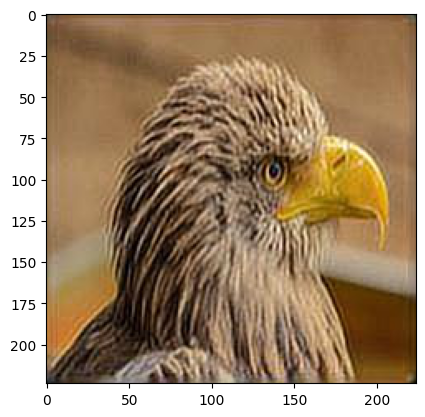

In [ ]:

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/output.jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
